In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\lenovo\Downloads\superstore.csv")

In [3]:
# Convert 'Order.Date' to datetime and ensure data is sorted by date
data['Order.Date'] = pd.to_datetime(data['Order.Date'], errors='coerce')
data = data.dropna(subset=['Order.Date', 'Sales', 'Shipping.Cost'])  # Drop rows with NaN in relevant columns
data = data.sort_values(by='Order.Date')

In [4]:
# Aggregate daily data
daily_data = data.groupby('Order.Date')[['Sales', 'Shipping.Cost']].sum()

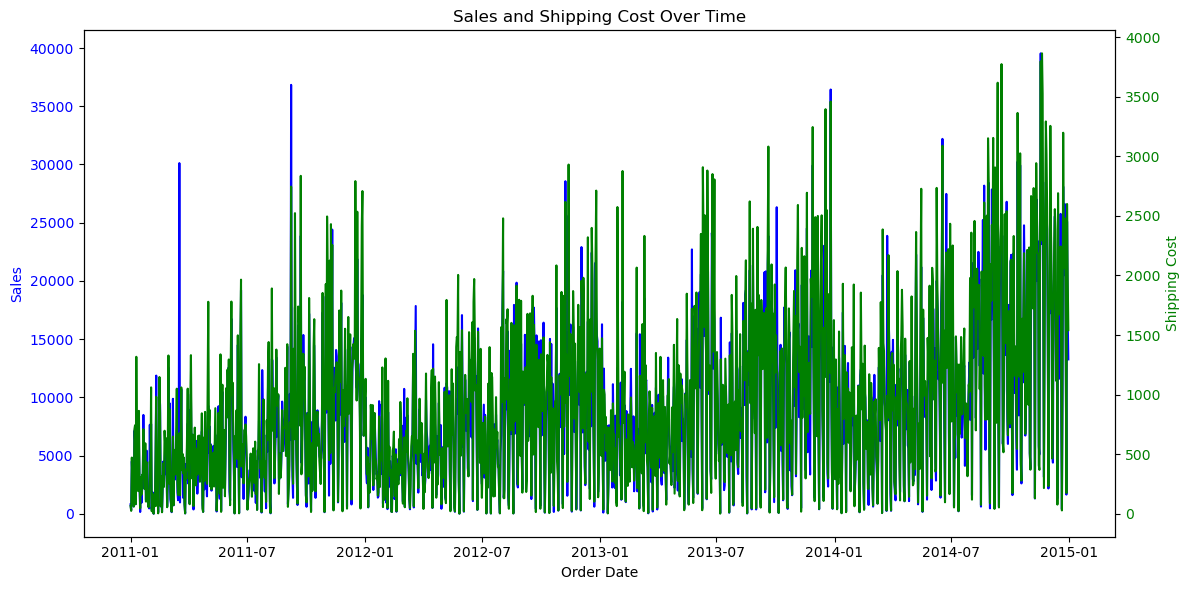

In [10]:
# Create the plot with multiple y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Sales on the primary y-axis
ax1.plot(daily_data.index, daily_data['Sales'], color='blue', label='Sales')
ax1.set_xlabel('Order Date')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for Shipping Cost
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['Shipping.Cost'], color='green', label='Shipping Cost')
ax2.set_ylabel('Shipping Cost', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Title and layout
plt.title('Sales and Shipping Cost Over Time')
fig.tight_layout()
plt.show()